In [ ]:
!pip install ylearn==0.2.0
!pip install networkx==2.8.8

In [ ]:
from ylearn.causal_model.graph import CausalGraph
from ylearn.causal_model.model import CausalModel

causation = {
    'X1': [],
    'X2': [],
    'X3': ['X1'],
    'X4': ['X1', 'X2'],
    'X5': ['X2'],
    'X6': ['X','X1', 'X2'],
    'X': ['X3', 'X4', 'X5'],
    'Y': ['X3', 'X4', 'X5', 'X6', 'X'],
}

cg = CausalGraph(causation=causation)
cm = CausalModel(causal_graph=cg)
backdoor_set, prob = cm.identify(treatment={'X'}, outcome={'Y'}, identify_method=('backdoor', 'simple'))['backdoor']

print(backdoor_set)

['X3', 'X4', 'X5']


In [ ]:
##### 以下、グラフの可視化用コード ####

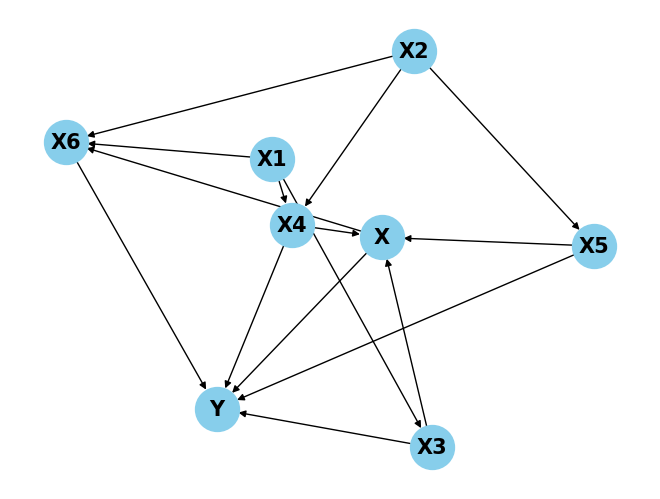

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Add nodes
for node in causation.keys():
    G.add_node(node)

# Add edges based on causation
for target, sources in causation.items():
    for source in sources:
        G.add_edge(source, target)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_color='skyblue', font_weight='bold', node_size=1000, font_size=15)
plt.show()